<a href="https://colab.research.google.com/github/DGuilherme/PMTese/blob/main/notebooks/DatasetOverview/CMAPSS_Dataset_Overview_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
# Install any missing libraries
!pip install tensorflow

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

column_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1, 22)]



Mounted at /content/drive


In [4]:
# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt/train_FD001.txt', delim_whitespace=True, header=None)
test_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD001.txt/test_FD001.txt', delim_whitespace=True, header=None)
rul_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD001.txt/RUL_FD001.txt', delim_whitespace=True, header=None)

# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD002 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD002.txt/train_FD002.txt', delim_whitespace=True, header=None)
test_data_FD002 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD002.txt/test_FD002.txt', delim_whitespace=True, header=None)
rul_data_FD002 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD002.txt/RUL_FD002.txt', delim_whitespace=True, header=None)

# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD003 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD003.txt/train_FD003.txt', delim_whitespace=True, header=None)
test_data_FD003 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD003.txt/test_FD003.txt', delim_whitespace=True, header=None)
rul_data_FD003 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD003.txt/RUL_FD003.txt', delim_whitespace=True, header=None)

# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD004 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD004.txt/train_FD004.txt', delim_whitespace=True, header=None)
test_data_FD004 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD004.txt/test_FD004.txt', delim_whitespace=True, header=None)
rul_data_FD004 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD004.txt/RUL_FD004.txt', delim_whitespace=True, header=None)

<ipython-input-4-adf62fbf8ad2>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt/train_FD001.txt', delim_whitespace=True, header=None)
<ipython-input-4-adf62fbf8ad2>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD001.txt/test_FD001.txt', delim_whitespace=True, header=None)
<ipython-input-4-adf62fbf8ad2>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rul_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD001.txt

In [5]:
train_data_FD001.columns = column_names
test_data_FD001.columns = column_names
rul_data_FD001.columns = ['RUL']

train_data_FD002.columns = column_names
test_data_FD002.columns = column_names
rul_data_FD002.columns = ['RUL']

train_data_FD003.columns = column_names
test_data_FD003.columns = column_names
rul_data_FD003.columns = ['RUL']

train_data_FD004.columns = column_names
test_data_FD004.columns = column_names
rul_data_FD004.columns = ['RUL']

In [7]:
for dataset_num in range(1, 5):
  train_data_var = f"train_data_FD00{dataset_num}"
  test_data_var = f"test_data_FD00{dataset_num}"
  rul_data_var = f"rul_data_FD00{dataset_num}"

  # Access the DataFrames using globals() and assign column names
  globals()[train_data_var].columns = column_names
  globals()[test_data_var].columns = column_names
  globals()[rul_data_var].columns = ['RUL']

# Basic info

In [14]:
for dataset_num in range(1, 5):
  print('-----------------------------------------------')
  print(f"-----------------FD00{dataset_num}-------------------------")
  train_data_var = f"train_data_FD00{dataset_num}"
  test_data_var = f"test_data_FD00{dataset_num}"
  rul_data_var = f"rul_data_FD00{dataset_num}"

  # Check the shape of the data
  print(f"Training Data Shape: {globals()[train_data_var].shape}")
  print(f"Test Data Shape: {globals()[train_data_var].shape}")
  print(f"RUL Data Shape: {globals()[train_data_var].shape}")

  # Check for missing values
  print('----------------Train Data---------------------')
  print(globals()[train_data_var].isnull().sum())
  print('----------------Test Data----------------------')
  print(globals()[train_data_var].isnull().sum())
  print('----------------RUL Data----------------------')
  print(globals()[train_data_var].isnull().sum())

-----------------------------------------------
-----------------FD001-------------------------
Training Data Shape: (20631, 26)
Test Data Shape: (20631, 26)
RUL Data Shape: (20631, 26)
----------------Train Data---------------------
id          0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64
----------------Test Data----------------------
id          0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
senso

# Data Visualization


-----------------------------------------------
-----------------FD001-------------------------


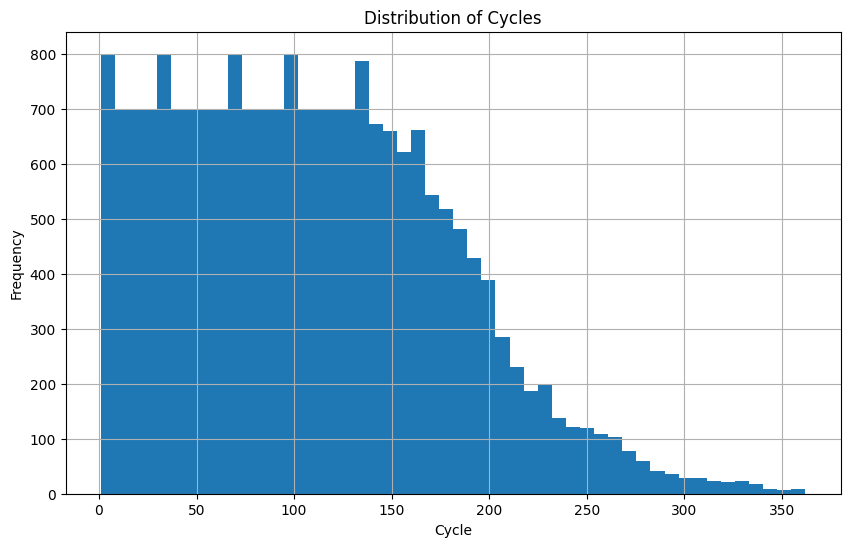

-----------------------------------------------
-----------------FD002-------------------------


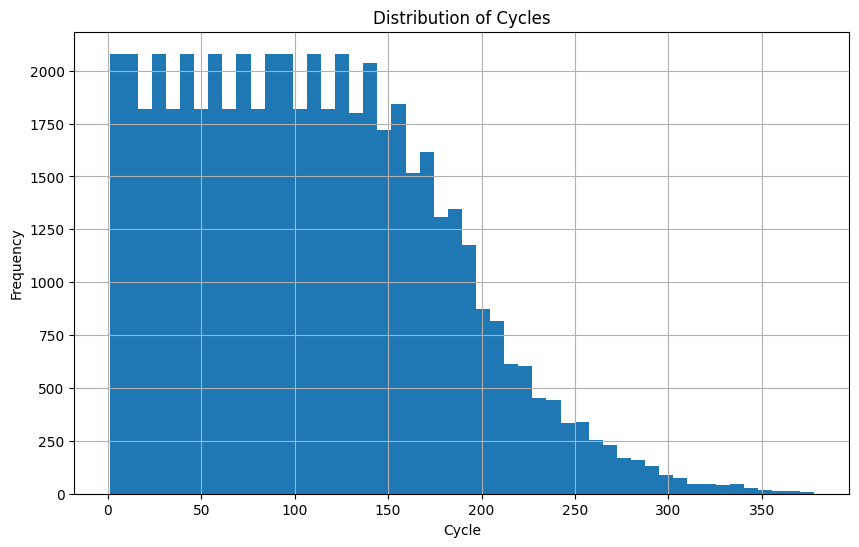

-----------------------------------------------
-----------------FD003-------------------------


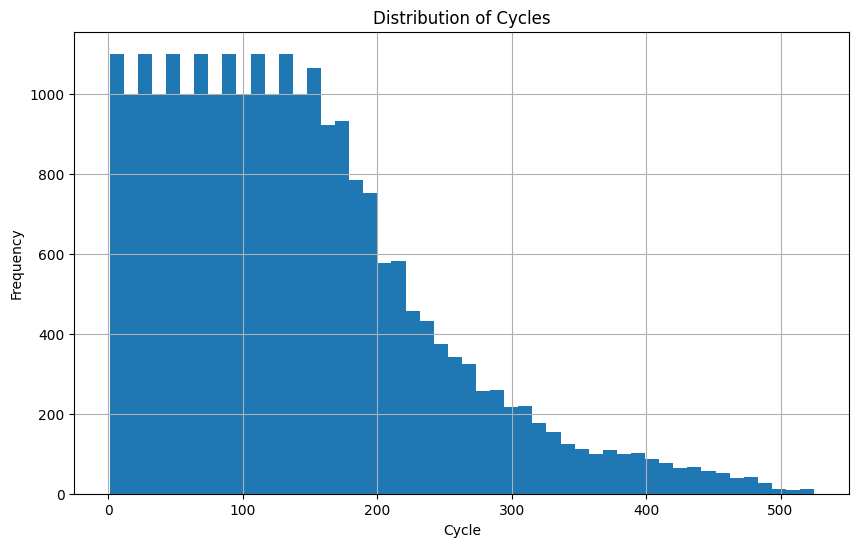

-----------------------------------------------
-----------------FD004-------------------------


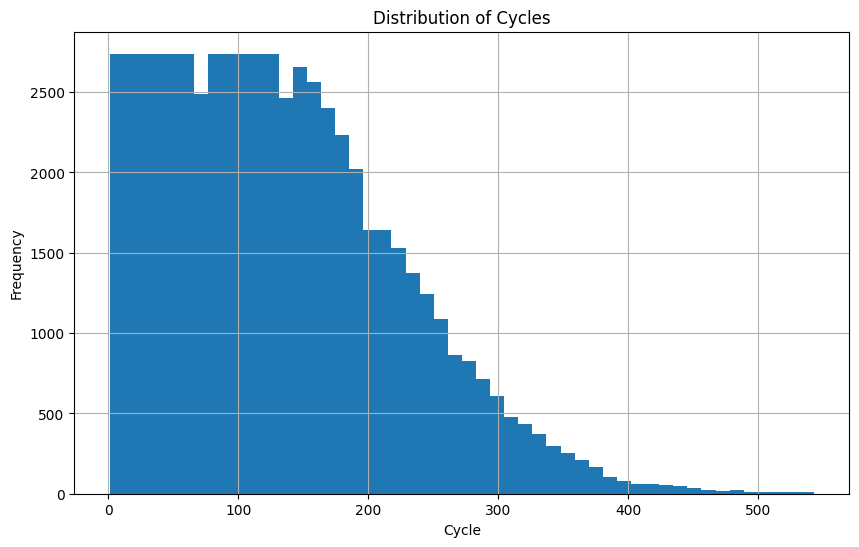

In [16]:
for dataset_num in range(1, 5):
  print('-----------------------------------------------')
  print(f"-----------------FD00{dataset_num}-------------------------")
  train_data_var = f"train_data_FD00{dataset_num}"
  test_data_var = f"test_data_FD00{dataset_num}"
  rul_data_var = f"rul_data_FD00{dataset_num}"

  plt.figure(figsize=(10, 6))
  globals()[train_data_var]['cycle'].hist(bins=50)
  plt.xlabel('Cycle')
  plt.ylabel('Frequency')
  plt.title('Distribution of Cycles')
  plt.show()

## Heatmap

-----------------------------------------------
-----------------FD001-------------------------


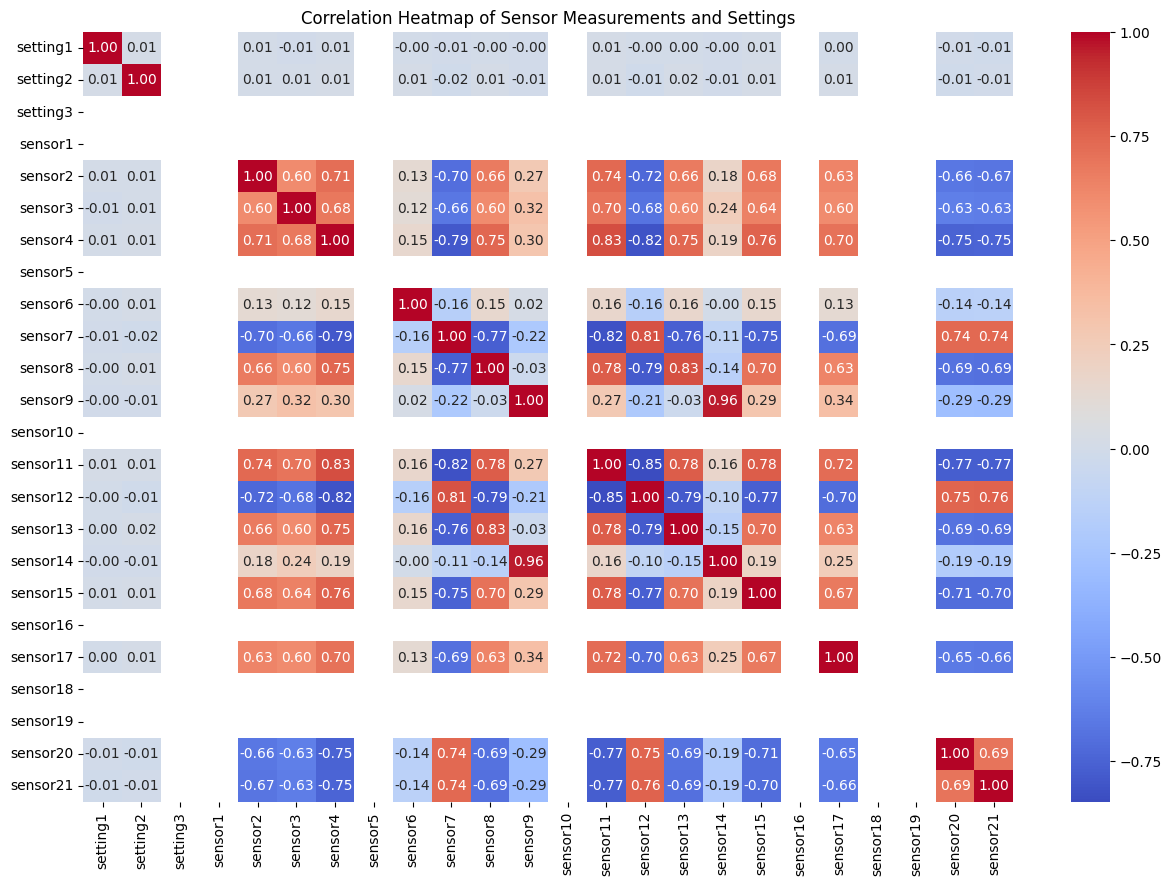

-----------------------------------------------
-----------------FD002-------------------------


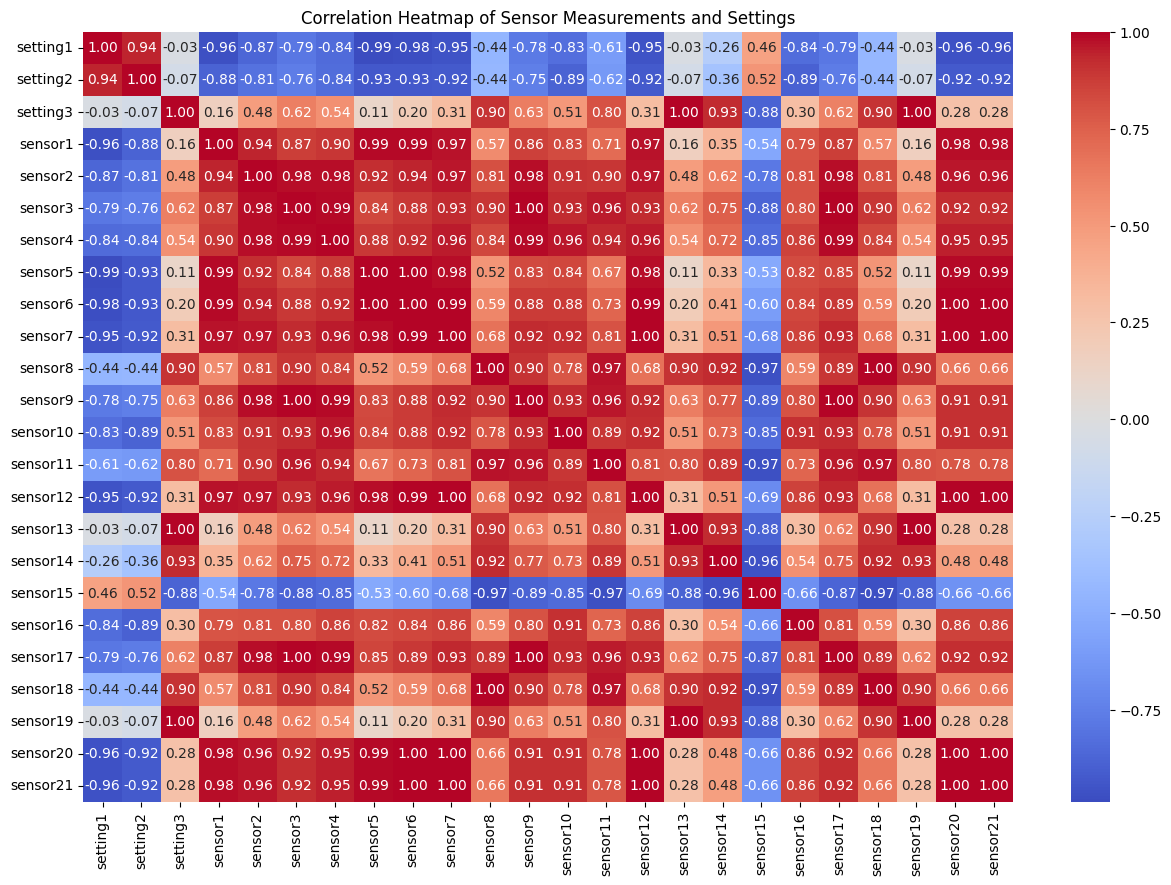

-----------------------------------------------
-----------------FD003-------------------------


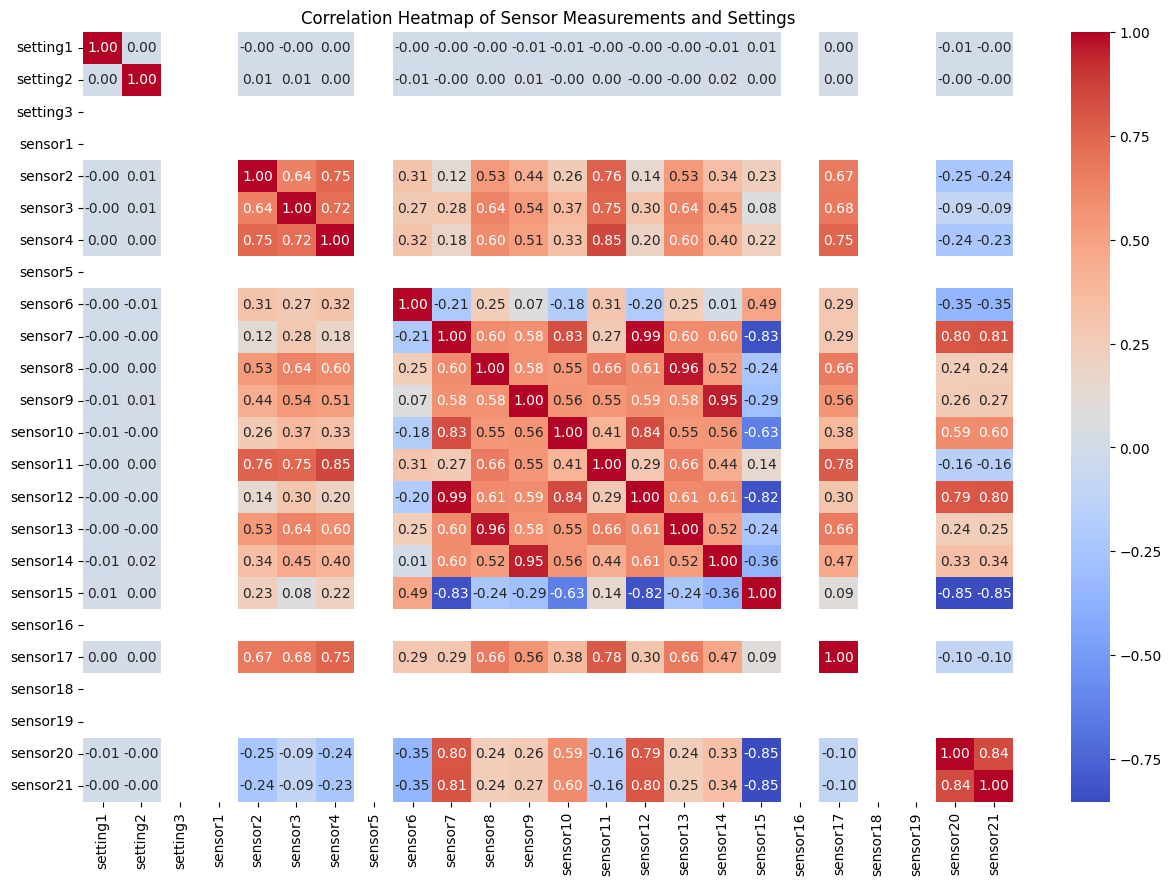

-----------------------------------------------
-----------------FD004-------------------------


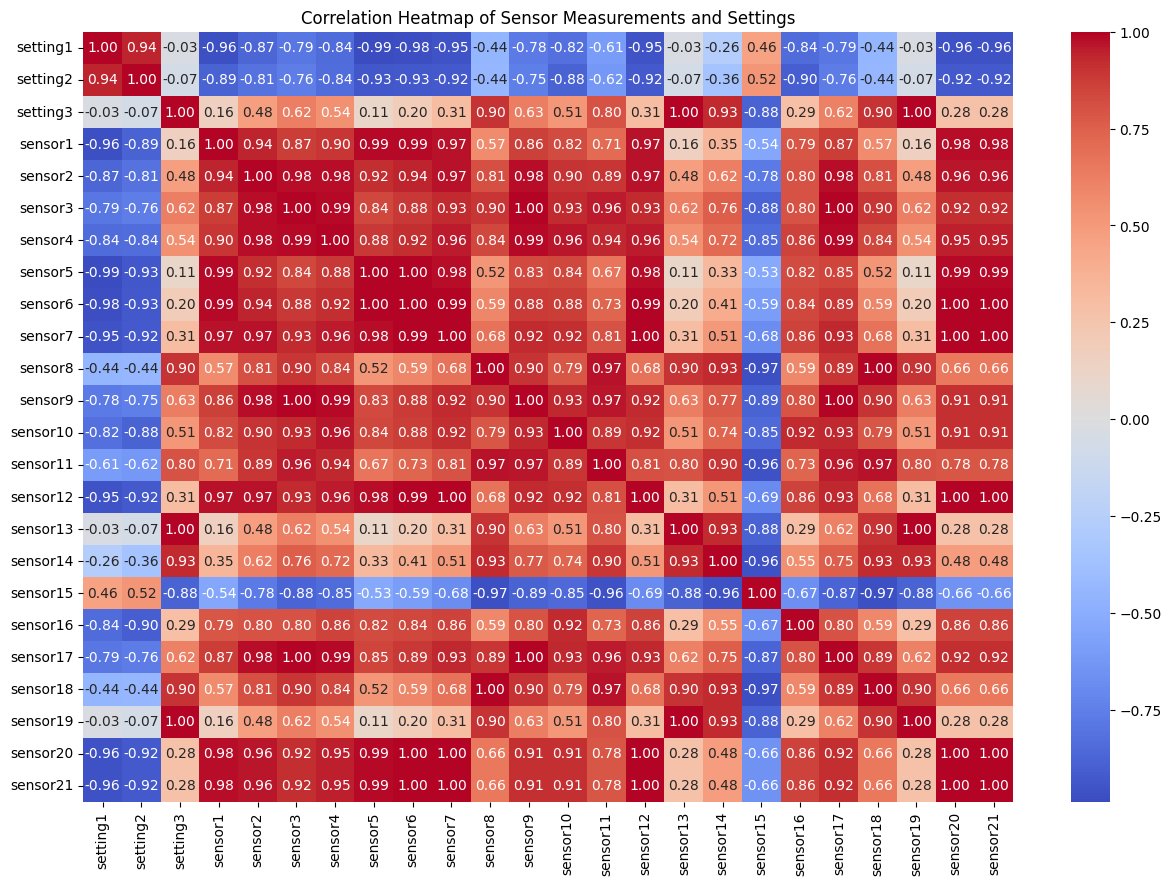

In [18]:


for dataset_num in range(1, 5):
  print('-----------------------------------------------')
  print(f"-----------------FD00{dataset_num}-------------------------")
  train_data_var = f"train_data_FD00{dataset_num}"
  test_data_var = f"test_data_FD00{dataset_num}"
  rul_data_var = f"rul_data_FD00{dataset_num}"

  plt.figure(figsize=(15, 10))
  sns.heatmap(globals()[train_data_var].iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
  plt.title('Correlation Heatmap of Sensor Measurements and Settings')
  plt.show()

## RUL distribution


-----------------------------------------------
-----------------FD001-------------------------


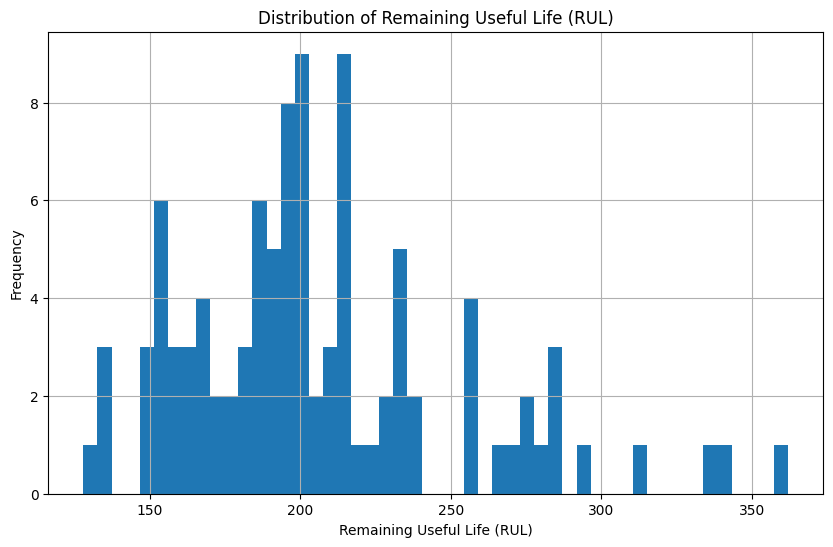

-----------------------------------------------
-----------------FD002-------------------------


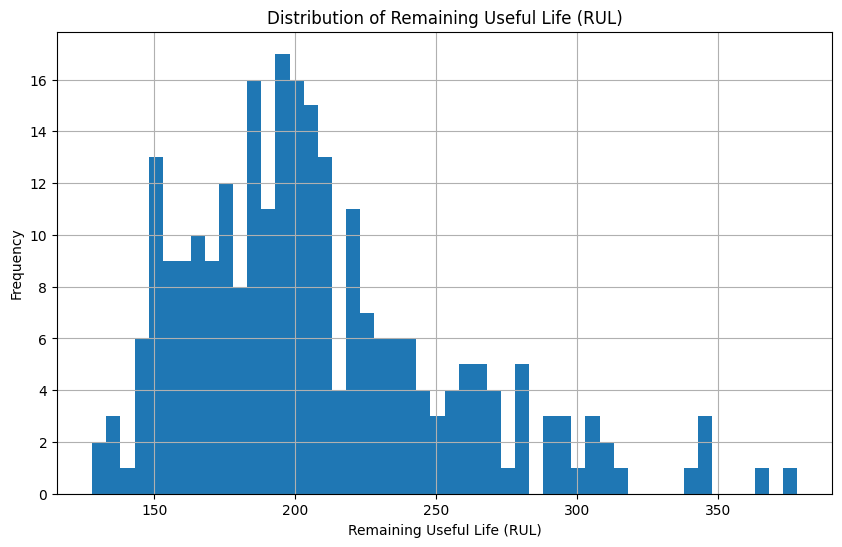

-----------------------------------------------
-----------------FD003-------------------------


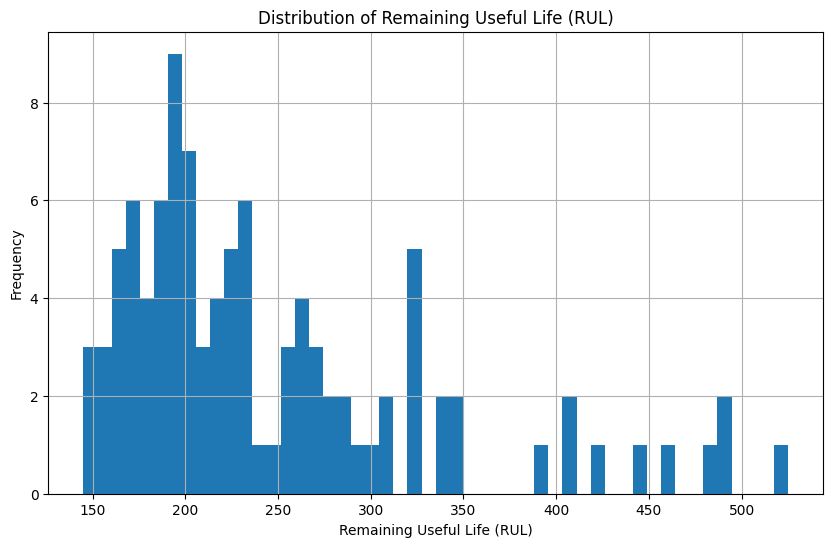

-----------------------------------------------
-----------------FD004-------------------------


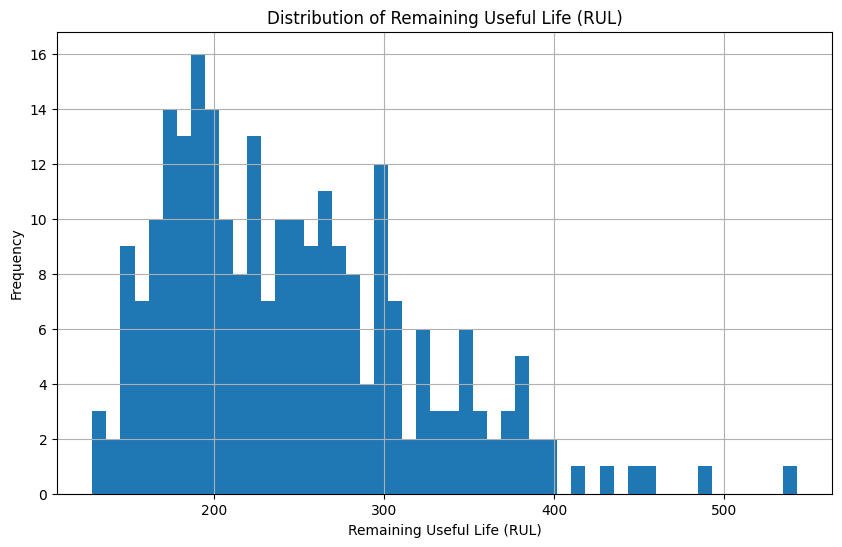

In [19]:
for dataset_num in range(1, 5):
  print('-----------------------------------------------')
  print(f"-----------------FD00{dataset_num}-------------------------")
  train_data_var = f"train_data_FD00{dataset_num}"
  test_data_var = f"test_data_FD00{dataset_num}"
  rul_data_var = f"rul_data_FD00{dataset_num}"

  # Calculate RUL for the training data
  train_rul = globals()[train_data_var].groupby('id')['cycle'].max().reset_index()
  train_rul.columns = ['id', 'max_cycle']
  train_rul['RUL'] = train_rul['max_cycle']

  plt.figure(figsize=(10, 6))
  train_rul['RUL'].hist(bins=50)
  plt.xlabel('Remaining Useful Life (RUL)')
  plt.ylabel('Frequency')
  plt.title('Distribution of Remaining Useful Life (RUL)')
  plt.show()